# ResNet-Competition

__Author: Supreme Leader<br>
Email: [erik.rosvall@gmail.com](mailto:erik.rosvall@gmail.com)__

In [23]:
from keras.datasets import mnist
from keras import layers,models,preprocessing,utils
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(X_train,(-1,784))
X_test = np.reshape(X_test,(-1,784))
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [24]:
from keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

In [37]:
input_layer = layers.Input(shape=(784,))
# Create a block
bi = layers.Dense(10,activation='relu')(input_layer)
br = layers.Dense(10,activation='relu')(bi)
br2 = layers.Dense(10,activation='relu')(br)
ba = layers.Add()([bi,br2])
bc = layers.Activation(activation='relu')(ba)
# End of block 1
# Create a block
bi = layers.Dense(10,activation='relu')(bc)
br = layers.Dense(10,activation='relu')(bi)
br2 = layers.Dense(10,activation='relu')(br)
ba = layers.Add()([bi,br2])
bc = layers.Activation(activation='relu')(ba)
# Create a block
bi = layers.Dense(10,activation='relu')(bc)
br = layers.Dense(10,activation='relu')(bi)
br2 = layers.Dense(10,activation='relu')(br)
ba = layers.Add()([bi,br2])
bc = layers.Activation(activation='relu')(ba)

# Create a block
bi = layers.Dense(10,activation='relu')(bc)
br = layers.Dense(10,activation='relu')(bi)
br2 = layers.Dense(10,activation='relu')(br)
ba = layers.Add()([bi,br2])
bc = layers.Activation(activation='relu')(ba)
# Create a block
bi = layers.Dense(10,activation='relu')(bc)
br = layers.Dense(10,activation='relu')(bi)
br2 = layers.Dense(10,activation='relu')(br)
ba = layers.Add()([bi,br2])
bc = layers.Activation(activation='relu')(ba)

# Create a block
bi = layers.Dense(10,activation='relu')(bc)
br = layers.Dense(10,activation='relu')(bi)
b_last = layers.Dense(10,activation='relu')(br)
# Create a block
output = layers.Dense(10,activation='softmax')(b_last)


In [38]:
model = Model(inputs=input_layer,outputs = output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.count_params()

9830

In [39]:
trainingHistory = model.fit(X_train,y_train,epochs=500,validation_split=0.20,callbacks=[ES],batch_size=500,shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/500
48000/48000 [==============================] - 6s 135us/step - loss: 2.3835 - acc: 0.1551 - val_loss: 2.0921 - val_acc: 0.2043
Epoch 2/500
48000/48000 [==============================] - 1s 22us/step - loss: 1.8833 - acc: 0.2495 - val_loss: 1.6609 - val_acc: 0.3484
Epoch 3/500
48000/48000 [==============================] - 1s 22us/step - loss: 1.4872 - acc: 0.4181 - val_loss: 1.3026 - val_acc: 0.5046
Epoch 4/500
48000/48000 [==============================] - 1s 24us/step - loss: 1.1960 - acc: 0.5427 - val_loss: 1.1200 - val_acc: 0.5625
Epoch 5/500
48000/48000 [==============================] - 1s 25us/step - loss: 1.0771 - acc: 0.5853 - val_loss: 1.0324 - val_acc: 0.5909
Epoch 6/500
48000/48000 [==============================] - 1s 27us/step - loss: 1.0098 - acc: 0.6086 - val_loss: 0.9884 - val_acc: 0.6287
Epoch 7/500
48000/48000 [==============================] - 2s 34us/step - loss: 0.9746 - acc: 0.6242 - val_loss: 0.9667 -

limit_output extension: Maximum message size of 40000 exceeded with 40138 characters

10000/10000 [==============================] - 1s 70us/step
Nr of epochs:135 with final acc 0.9197


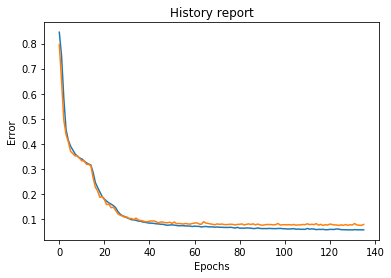

In [40]:
_,acc = model.evaluate(X_test, y_test)
print('Nr of epochs:' + str(trainingHistory.epoch[-1]) +' with final acc ' + str(acc))
plt.plot([1-x for x in trainingHistory.history['acc']])
plt.plot([1-x for x in trainingHistory.history['val_acc']])
plt.title('History report')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [41]:
utils.plot_model(model, to_file='model.png')

<img src="model.png">